<a href="https://colab.research.google.com/github/Ankushsb62/OASIS-INFOBYTE/blob/PROJECT-2/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Load the dataset
data = pd.read_csv('ifood_df.csv')

In [ ]:
# Print the first few rows of the dataset
print(data.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [ ]:
# Check for missing values
print(data.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [ ]:
# Calculate average purchase value
avg_purchase_value = data['MntTotal'].mean()
print(f"Average Purchase Value: {avg_purchase_value}")

Average Purchase Value: 562.7646258503402


In [ ]:
# Calculate frequency of purchases
purchase_freq = data.groupby('Customer_Days')['MntTotal'].count()
print(f"Purchase Frequency:\n{purchase_freq.describe()}")

Purchase Frequency:
count    662.000000
mean       3.330816
std        1.905701
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       12.000000
Name: MntTotal, dtype: float64


In [ ]:
# Select relevant features for clustering
features = ['Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
X = data[features]


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

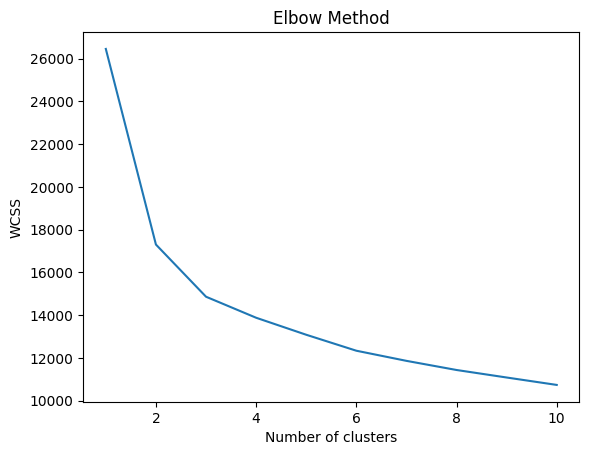

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Perform customer segmentation
k = 3  # Choose the optimal number of clusters based on the Elbow Method
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

In [ ]:
print(clusters)

[2 0 1 ... 1 2 0]


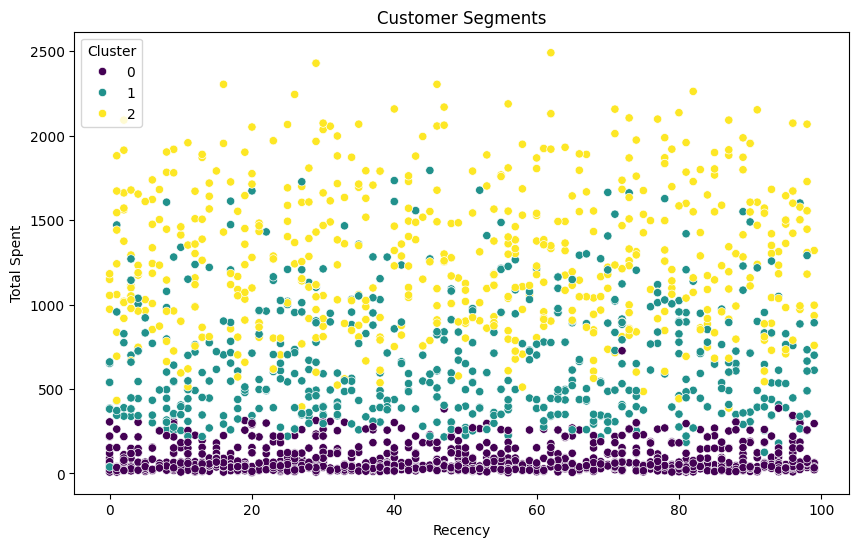

In [ ]:
# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='MntTotal', data=data, hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Recency')
plt.ylabel('Total Spent')
plt.show()
